In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm 
%matplotlib inline

/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5a55d2048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5a5434470>], dtype=object)

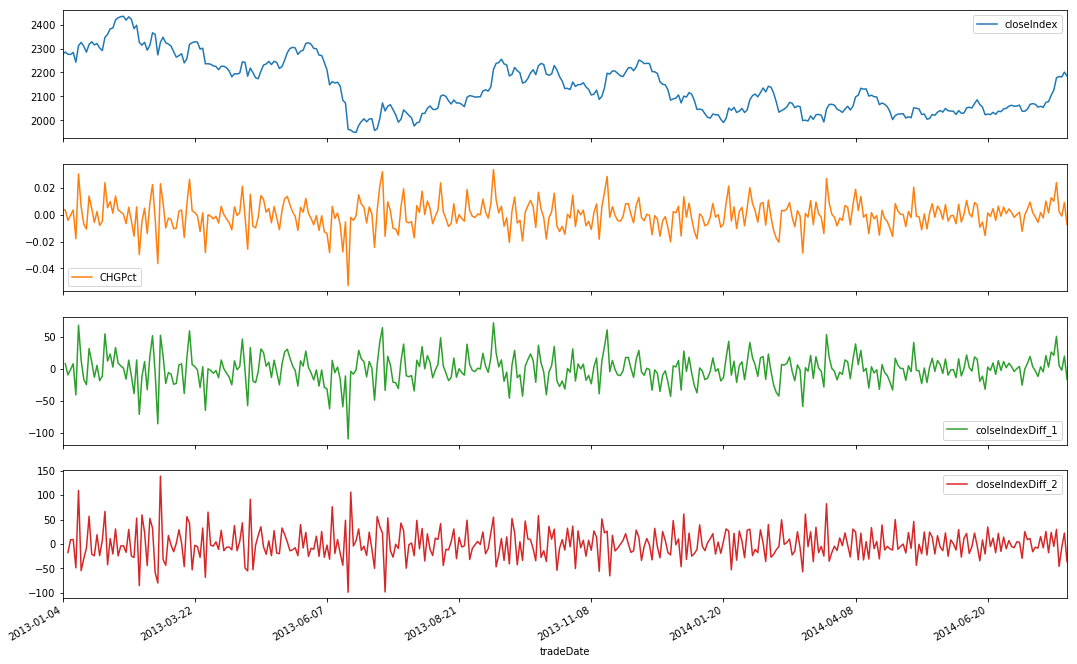

In [2]:
IndexData = pd.read_csv('01pct.csv')
IndexData = IndexData.set_index(IndexData['tradeDate'])
IndexData['colseIndexDiff_1'] = IndexData['closeIndex'].diff(1)  # 1阶差分处理
IndexData['closeIndexDiff_2'] = IndexData['colseIndexDiff_1'].diff(1)  # 2阶差分处理
IndexData.plot(subplots=True,figsize=(18,12))

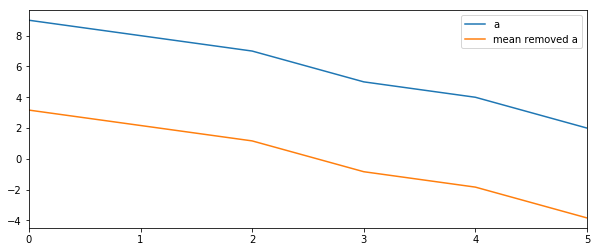

In [3]:
a = pd.Series([9,8,7,5,4,2])
b = a - a.mean() # 去均值
plt.figure(figsize=(10,4))
a.plot(label='a')
b.plot(label='mean removed a')
plt.legend()

In [4]:
data = IndexData['closeIndex'] # 上证指数
m = 10 # 我们检验10个自相关系数

acf,q,p = sm.tsa.acf(data,nlags=m,qstat=True)  ## 计算自相关系数 及p-value
out = np.c_[range(1,11), acf[1:], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output

,AC,Q,P-value
lag,,,
1.0,0.977190,366.688991,9.842648e-82
2.0,0.951513,715.277906,4.779432e-156
3.0,0.927073,1047.065270,1.109192e-226
4.0,0.902993,1362.675600,8.565497e-294
5.0,0.878258,1662.026278,0.000000e+00
6.0,0.857131,1947.908436,0.000000e+00
7.0,0.836825,2221.134260,0.000000e+00
8.0,0.812991,2479.709003,0.000000e+00
9.0,0.789723,2724.350491,0.000000e+00


In [5]:
data2 = IndexData['CHGPct'] # 上证指数日涨跌
m = 10 # 我们检验10个自相关系数

acf,q,p = sm.tsa.acf(data2,nlags=m,qstat=True)  ## 计算自相关系数 及p-value
out = np.c_[range(1,11), acf[1:], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output

,AC,Q,P-value
lag,,,
1.0,0.065301,1.637490,0.200670
2.0,-0.014762,1.721391,0.422868
3.0,-0.022240,1.912341,0.590798
4.0,0.008116,1.937837,0.747191
5.0,-0.049070,2.872308,0.719664
6.0,-0.064429,4.487638,0.610989
7.0,0.080509,7.016621,0.427151
8.0,0.010938,7.063429,0.529805
9.0,0.028106,7.373304,0.598314


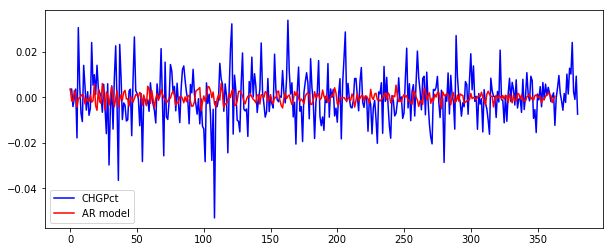

In [6]:
temp = np.array(data2) # 载入收益率序列
model = sm.tsa.AR(temp)  
results_AR = model.fit()  
plt.figure(figsize=(10,4))
plt.plot(temp,'b',label='CHGPct')
plt.plot(results_AR.fittedvalues, 'r',label='AR model')
plt.legend()

In [7]:
print(len(results_AR.roots))

17


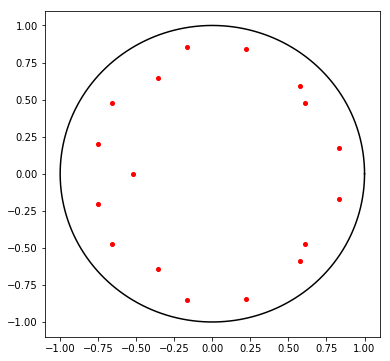

In [8]:
pi,sin,cos = np.pi,np.sin,np.cos
r1 = 1
theta = np.linspace(0,2*pi,360)
x1 = r1*cos(theta)
y1 = r1*sin(theta)
plt.figure(figsize=(6,6))
plt.plot(x1,y1,'k')  # 画单位圆
roots = 1/results_AR.roots  # 注意，这里results_AR.roots 是计算的特征方程的解，特征根应该取倒数
for i in range(len(roots)):
    plt.plot(roots[i].real,roots[i].imag,'.r',markersize=8)  #画特征根
plt.show()

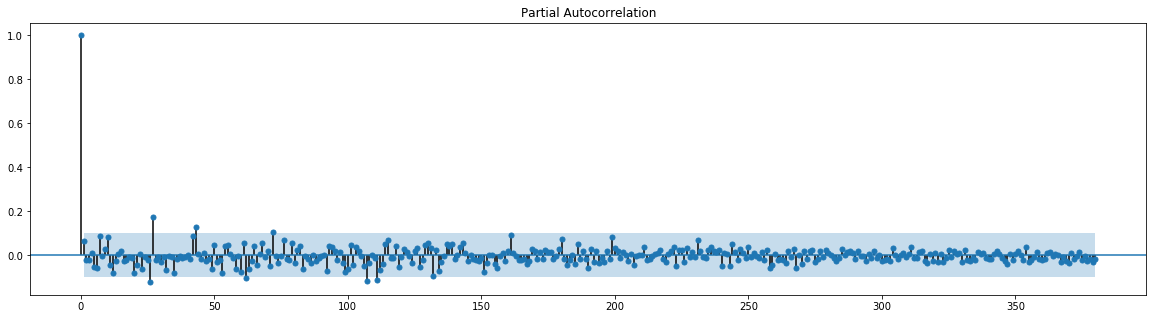

In [9]:
fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(temp,ax=ax1)

In [10]:
aicList = []
bicList = []
hqicList = []
for i in range(1,11):  #从1阶开始算
    order = (i,0)  # 这里使用了ARMA模型，order 代表了模型的(p,q)值，我们令q始终为0，就只考虑了AR情况。
    tempModel = sm.tsa.ARMA(temp,order).fit()
    aicList.append(tempModel.aic)
    bicList.append(tempModel.bic)
    hqicList.append(tempModel.hqic)

/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


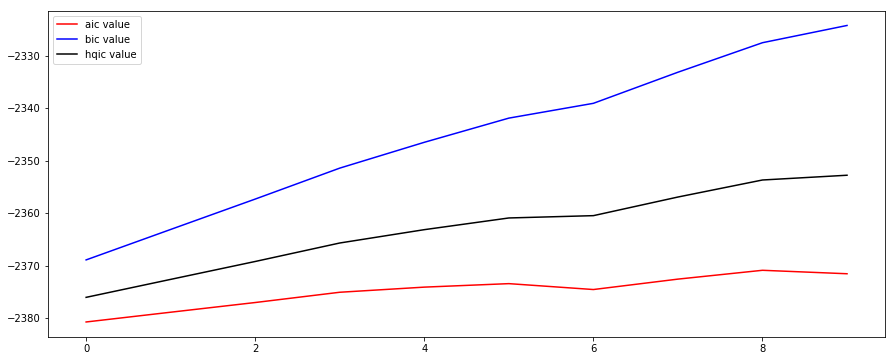

In [11]:
plt.figure(figsize=(15,6))
plt.plot(aicList,'r',label='aic value')
plt.plot(bicList,'b',label='bic value')
plt.plot(hqicList,'k',label='hqic value')
plt.legend(loc=0)

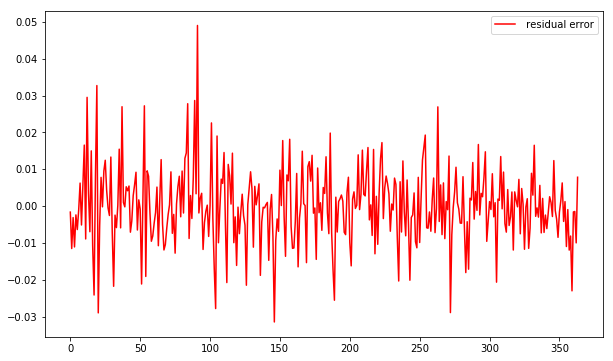

In [12]:
delta = results_AR.fittedvalues  - temp[17:]  # 残差
plt.figure(figsize=(10,6))

plt.plot(delta,'r',label=' residual error')
plt.legend(loc=0)

In [13]:
acf,q,p = sm.tsa.acf(delta,nlags=10,qstat=True)  ## 计算自相关系数 及p-value
out = np.c_[range(1,11), acf[1:], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output

,AC,Q,P-value
lag,,,
1.0,-0.001225,0.000551,0.981277
2.0,-0.007836,0.023149,0.988492
3.0,-0.002310,0.025119,0.998949
4.0,-0.007185,0.044223,0.999759
5.0,-0.000229,0.044243,0.999978
6.0,-0.001313,0.044884,0.999998
7.0,-0.005752,0.057229,1.000000
8.0,-0.005667,0.069248,1.000000
9.0,-0.011054,0.115102,1.000000


In [14]:
score = 1 - delta.var()/temp[17:].var()
print(score)

0.0405231650285


In [15]:
train = temp[:-10]
test = temp[-10:]
output = sm.tsa.AR(train).fit()  
output.predict()

array([  3.42464295e-03,  -2.01270731e-03,  -2.12777697e-03,
         2.45802768e-03,   9.25838275e-04,  -4.65826593e-03,
        -8.85754456e-04,  -6.37079284e-04,   4.08355465e-04,
         1.11050287e-03,   2.93557313e-04,  -2.98087189e-03,
        -8.35240666e-05,  -1.50112140e-03,  -1.58755318e-03,
         1.08556199e-03,  -2.16716347e-03,  -1.52846549e-03,
         5.35797580e-03,  -4.14756955e-03,  -5.75843557e-03,
         3.63645177e-03,  -2.14701575e-03,  -2.91915032e-03,
         5.89656332e-03,   1.92256357e-03,  -5.57766035e-03,
         2.41954745e-03,   1.03819177e-03,  -3.29024170e-03,
         7.14598312e-04,   4.63695481e-03,   2.01528383e-04,
        -4.43913541e-03,  -9.54672538e-04,   2.62910929e-03,
        -4.22506291e-03,  -1.44441706e-03,   1.12451675e-03,
        -8.70334406e-04,   2.27466410e-03,   2.98470212e-03,
        -7.98426224e-04,  -5.61096653e-04,  -3.83517222e-03,
        -3.23801717e-04,  -3.50082363e-05,  -2.11007596e-03,
        -7.34360836e-04,

In [16]:
predicts = output.predict(355, 364, dynamic=True)
print(len(predicts))
comp = pd.DataFrame()
comp['original'] = temp[-10:]
comp['predict'] = predicts
comp

10


,original,predict
0,-0.002228,0.000909
1,0.010223,-0.001472
2,0.001449,-0.002108
3,0.012785,-0.002158
4,0.010238,-0.000218
5,0.024139,0.000115
6,0.002408,0.001476
7,-0.000893,-0.000119
8,0.009315,-0.000520
9,-0.007385,-0.000161


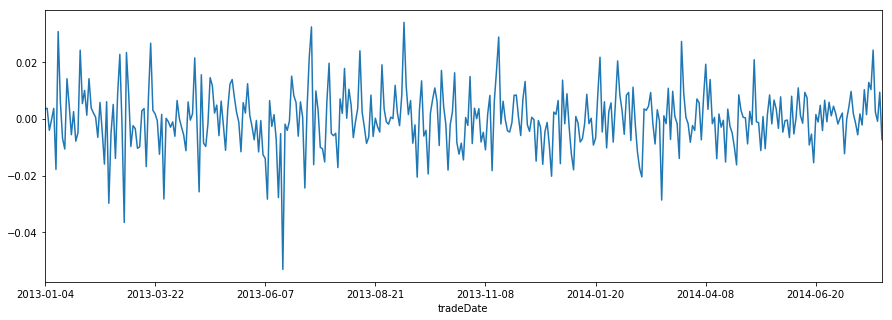

In [17]:
data = np.array(IndexData['CHGPct']) # 上证指数日涨跌
IndexData['CHGPct'].plot(figsize=(15,5))

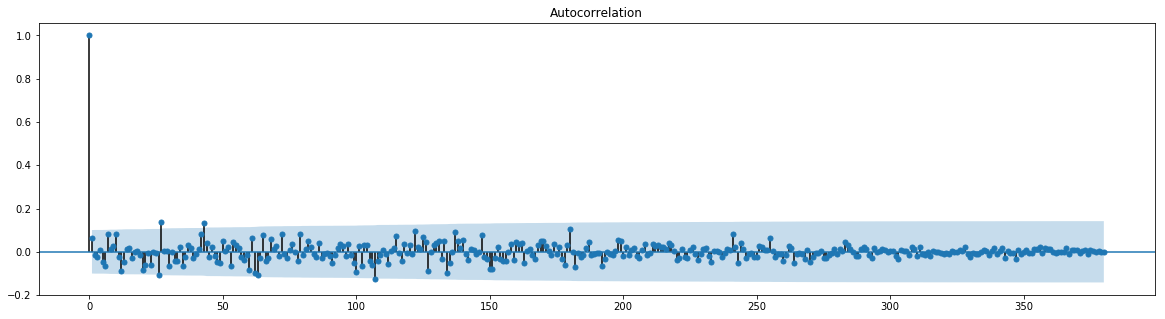

In [18]:
fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(data,ax=ax1)

In [19]:
order = (0,10)
train = data[:-10]
test = data[-10:]
tempModel = sm.tsa.ARMA(train,order).fit()

In [20]:
delta = tempModel.fittedvalues - train
score = 1 - delta.var()/train.var()
print(score)

0.0278739998881


10


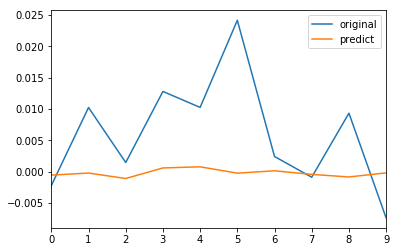

In [21]:
predicts = tempModel.predict(371, 380, dynamic=True)
print(len(predicts))
comp = pd.DataFrame()
comp['original'] = test
comp['predict'] = predicts
comp.plot()

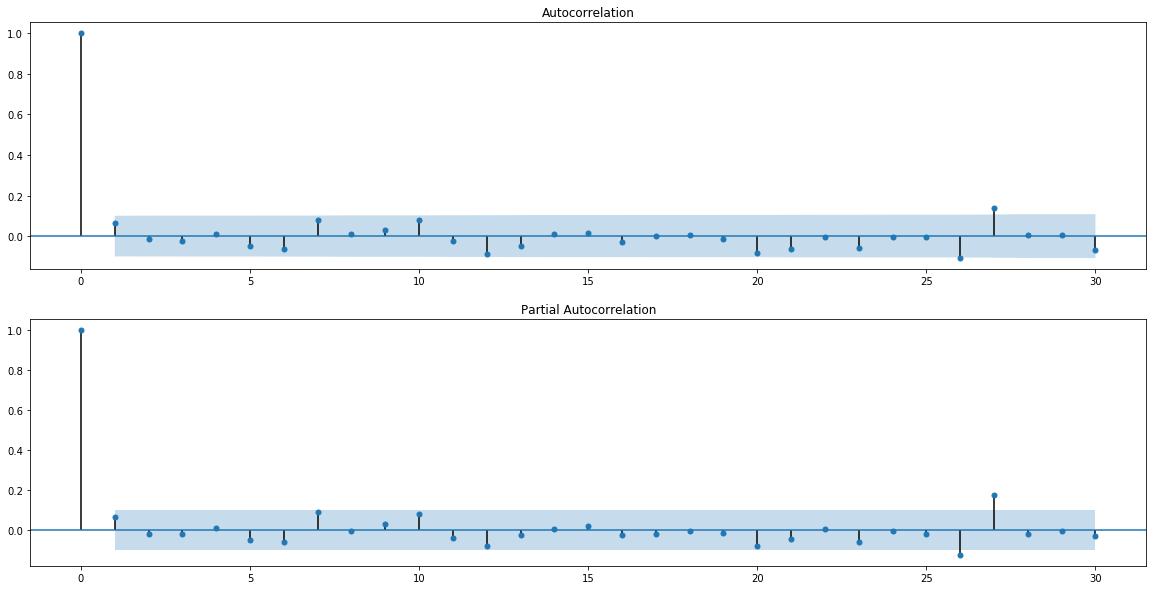

In [22]:
data = np.array(IndexData['CHGPct']) # 上证指数日涨跌

fig = plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data,lags=30,ax=ax2)

In [23]:
print("AIC", sm.tsa.arma_order_select_ic(data,max_ar=6,max_ma=4,ic='aic')['aic_min_order'])  # AIC
print("BIC", sm.tsa.arma_order_select_ic(data,max_ar=6,max_ma=4,ic='bic')['bic_min_order'])  # BIC
print("HQIC", sm.tsa.arma_order_select_ic(data,max_ar=6,max_ma=4,ic='hqic')['hqic_min_order']) # HQIC

/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to co

AIC (3, 3)


/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization f

BIC (0, 0)


/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization f

HQIC (0, 0)


/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [24]:
order = (3,2)
train = data[:-10]
test = data[-10:]
tempModel = sm.tsa.ARMA(train,order).fit()

/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [25]:
delta = tempModel.fittedvalues - train
score = 1 - delta.var()/train.var()
print(score)

0.0055187509265


10


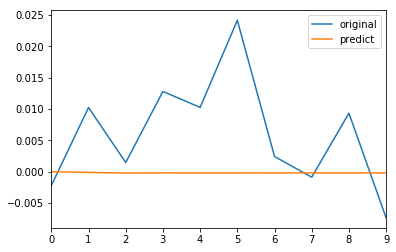

In [26]:
predicts = tempModel.predict(371, 380, dynamic=True)
print(len(predicts))
comp = pd.DataFrame()
comp['original'] = test
comp['predict'] = predicts
comp.plot()

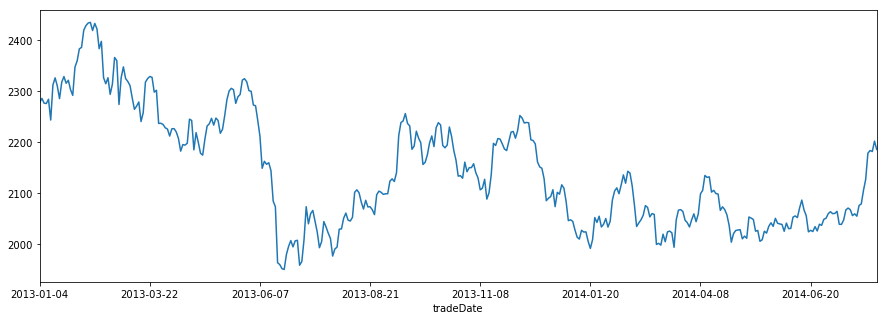

In [27]:
data2 = IndexData['closeIndex'] # 上证指数
data2.plot(figsize=(15,5))

In [28]:
temp = np.array(data2)
t = sm.tsa.stattools.adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-2.30472
p-value,0.170449
Lags Used,1
Number of Observations Used,379
Critical Value(1%),-3.44772
Critical Value(5%),-2.8692
Critical Value(10%),-2.57085


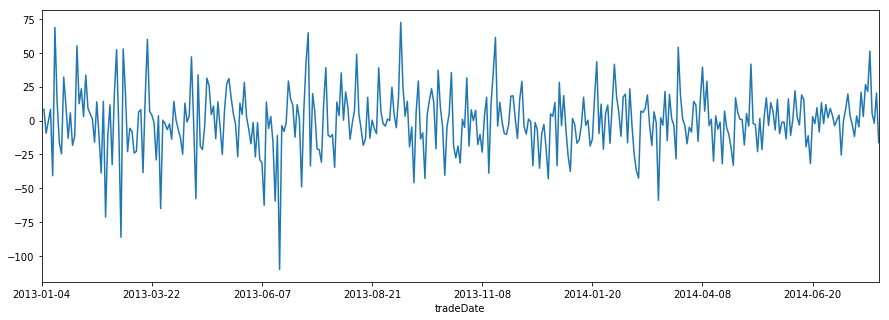

In [29]:
data2Diff = data2.diff()  # 差分
data2Diff.plot(figsize=(15,5))

In [30]:
temp = np.array(data2Diff)[1:] # 差分后第一个值为NaN,舍去
t = sm.tsa.stattools.adfuller(temp)  # ADF检验
print("p-value:   ",t[1])

p-value:    2.31245750144e-30


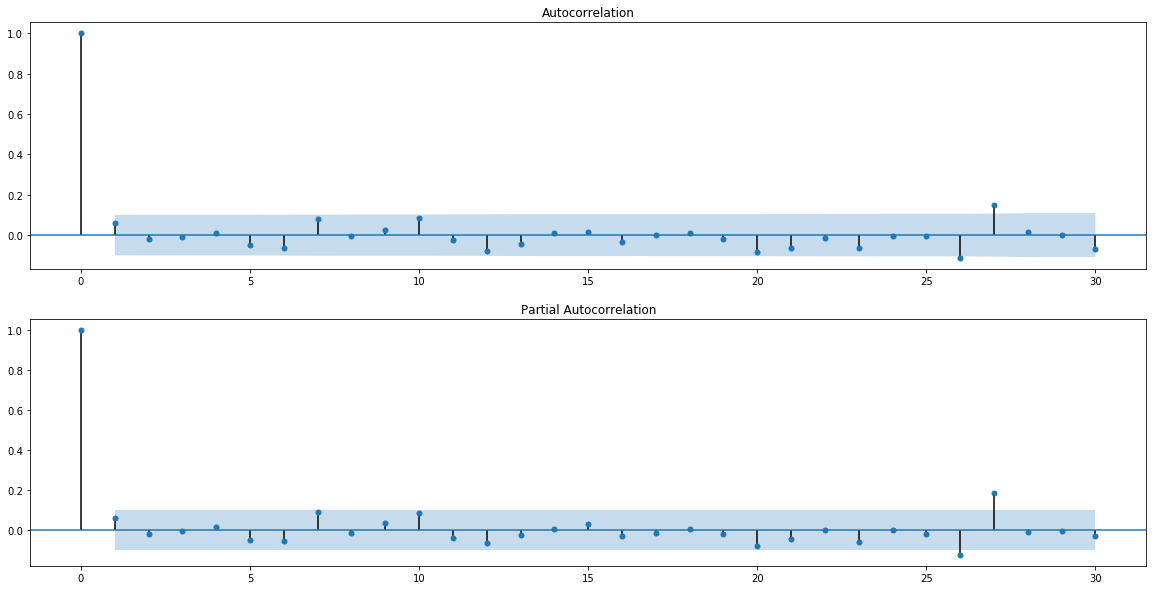

In [31]:
temp = np.array(data2Diff)[1:] # 差分后第一个值为NaN,舍去
fig = plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp,lags=30,ax=ax2)

In [32]:
sm.tsa.arma_order_select_ic(temp,max_ar=6,max_ma=4,ic='aic')['aic_min_order']  # AIC

/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/liubola

(2, 2)

In [33]:
order = (2,2)
data = np.array(data2Diff)[1:] # 差分后，第一个值为NaN
rawdata = np.array(data2)
train = data[:-10]
test = data[-10:]
model = sm.tsa.ARMA(train,order).fit()

/home/liubola/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


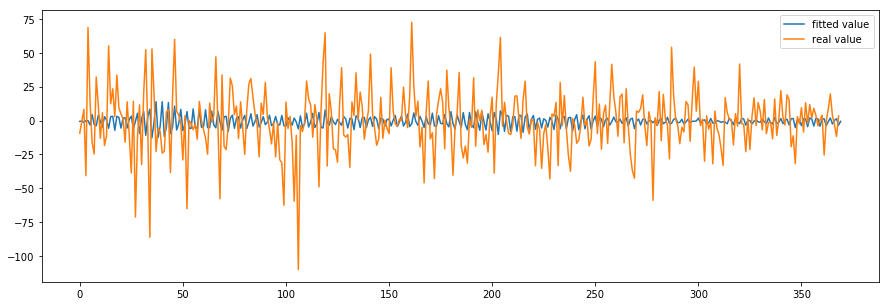

In [34]:
plt.figure(figsize=(15,5))
plt.plot(model.fittedvalues,label='fitted value')
plt.plot(train[1:],label='real value')
plt.legend(loc=0)

In [35]:
delta = model.fittedvalues - train
score = 1 - delta.var()/train[1:].var()
print(score)

0.0397490021589


10


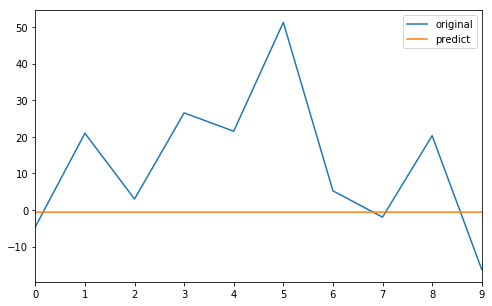

In [36]:
predicts = model.predict(10,381, dynamic=True)[-10:]
print(len(predicts))
comp = pd.DataFrame()
comp['original'] = test
comp['predict'] = predicts
comp.plot(figsize=(8,5))

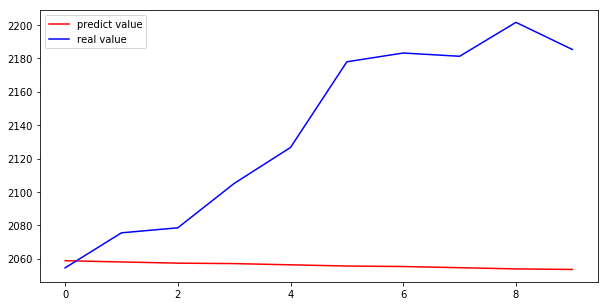

In [37]:
rec = [rawdata[-11]]
pre = model.predict(371, 380, dynamic=True) # 差分序列的预测
for i in range(10):
    rec.append(rec[i]+pre[i])
plt.figure(figsize=(10,5))
plt.plot(rec[-10:],'r',label='predict value')
plt.plot(rawdata[-10:],'blue',label='real value')    
plt.legend(loc=0)